# Portfolio Backtesting Engine:
Hi, thanks for checking this project out!

This is an end-to-end solution for portfolio backtesting, with quantitative finance metrics as the outputs as well as some visualisations. 
The only requirement beyond the libraries this notebook has the code to install already, is that you have your own FRED API Key; these are free to obtain from the St. Louis Federal Reserve Bank, and they are available here: https://fredaccount.stlouisfed.org/login/secure/ 

In [120]:
pip install --upgrade yfinance pandas_datareader fredapi babel seaborn statsmodels requests


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [96]:
# import libarries:
import math
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import seaborn as sns
from babel.numbers import get_currency_symbol
from IPython.display import display
import statsmodels.api as sm
import requests
from IPython.display import display


Start date: 2001-01-01 00:00:00
End date: 2025-08-28 14:53:16.548221


/var/folders/n0/3mnck_vx60x8k1vg2cs33ccc0000gn/T/ipykernel_17414/1871550255.py:75: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  5 of 5 completed


Remaining weight: 33.60%
Remaining weight: 23.90%
Remaining weight: 9.20%
Remaining weight: 3.60%
Remaining weight: 0.00%
VUAG.L: 66.4%
VFEG.L: 9.7%
VERG.L: 14.7%
VJPB.L: 5.6%
VUKG.L: 3.6%
Principal: £1,000.00
Quarterly Rebalancing Selected


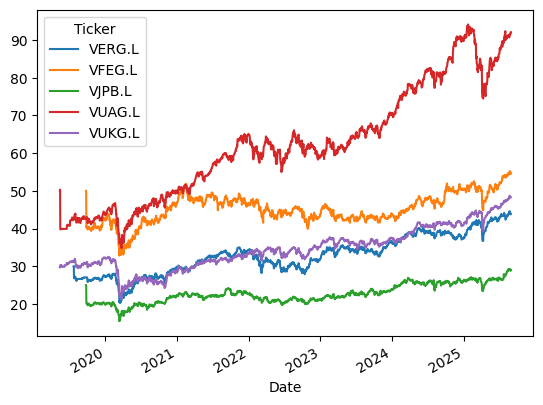

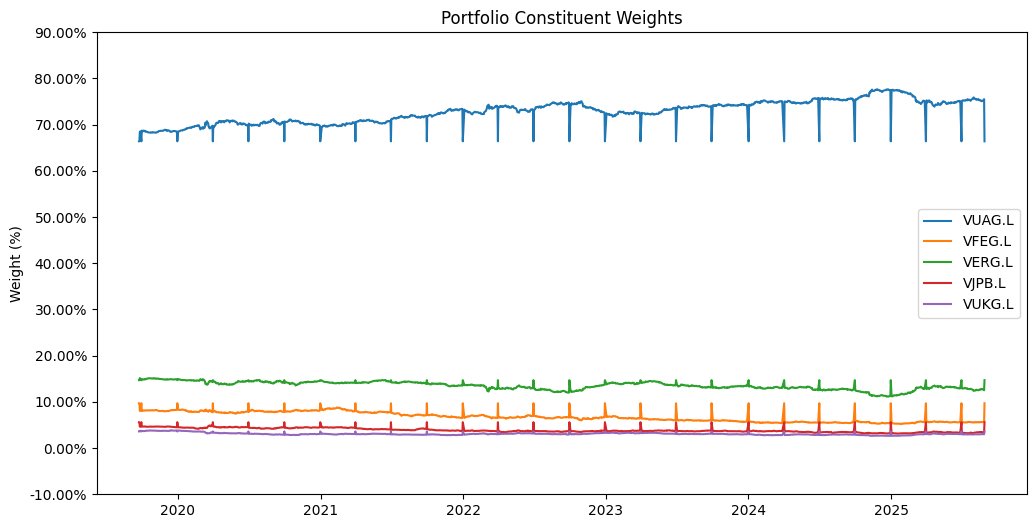

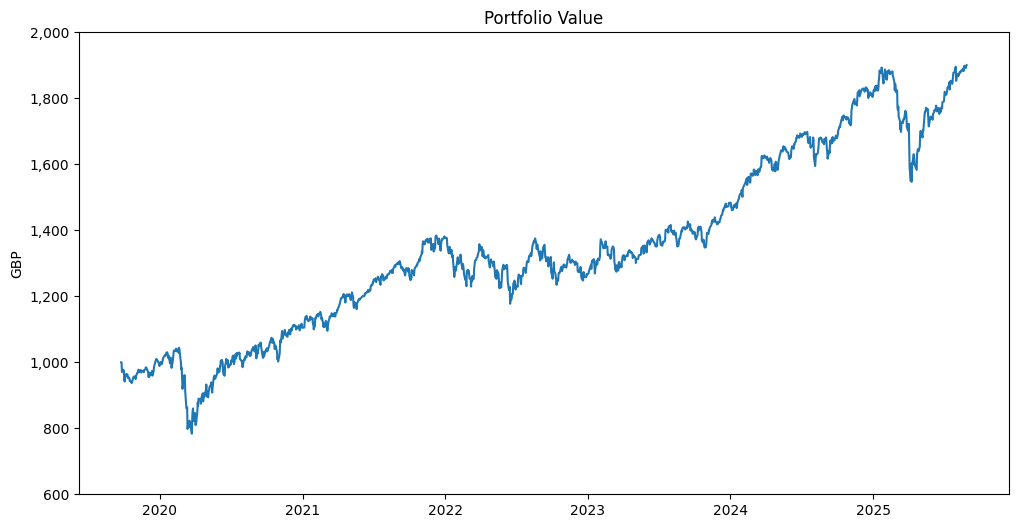

/var/folders/n0/3mnck_vx60x8k1vg2cs33ccc0000gn/T/ipykernel_17414/1871550255.py:513: FutureWarning: YF.download() has changed argument auto_adjust default to True
  test = yf.download(ticker, period = "1d")
[*********************100%***********************]  1 of 1 completed
/var/folders/n0/3mnck_vx60x8k1vg2cs33ccc0000gn/T/ipykernel_17414/1871550255.py:529: FutureWarning: YF.download() has changed argument auto_adjust default to True
  benchmark = yf.download(benchmark, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/n0/3mnck_vx60x8k1vg2cs33ccc0000gn/T/ipykernel_17414/1871550255.py:536: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download("SPY", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/n0/3mnck_vx60x8k1vg2cs33ccc0000gn/T/ipykernel_17414/1871550255.py:543: FutureWarning: YF.download() has changed argument a

CAPM OLS Regression Results:


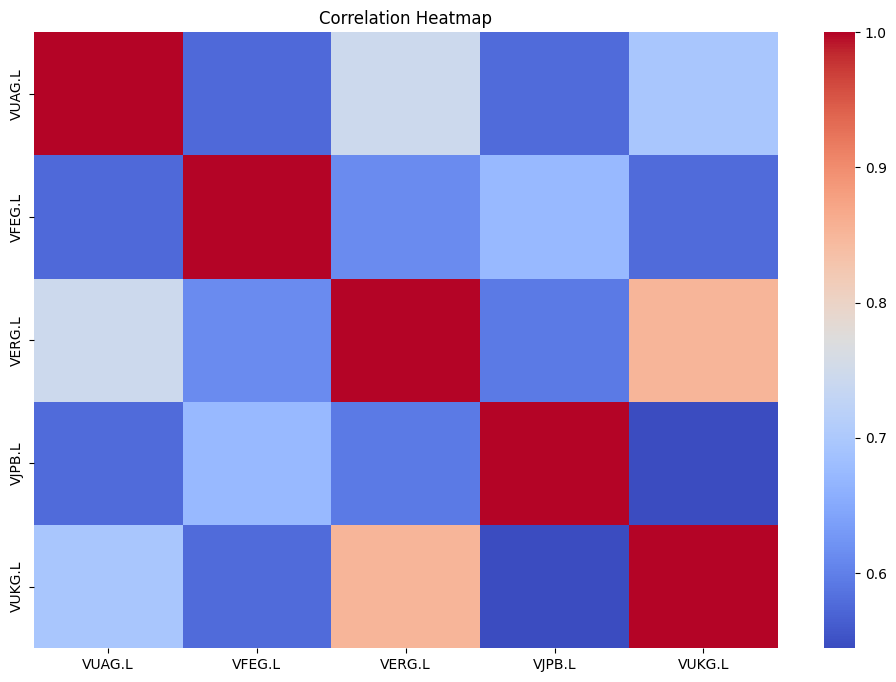

<Figure size 1200x800 with 0 Axes>

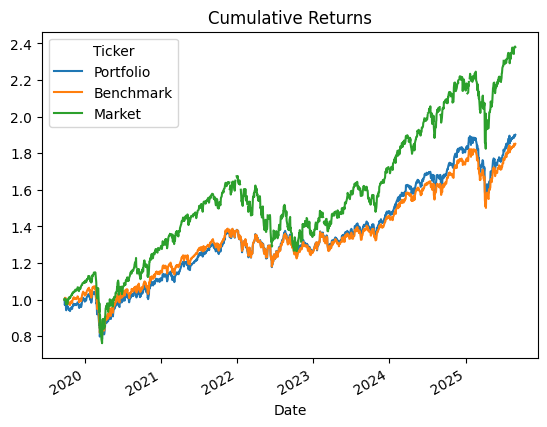

<Figure size 1200x800 with 0 Axes>

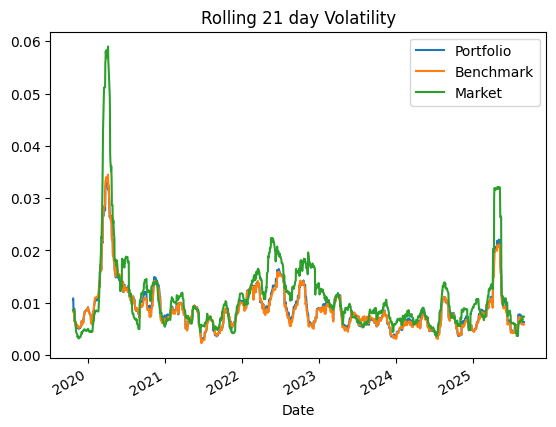

,Metric,Value
0,CAPM Beta,0.404891
1,Alpha (Annual),3.82%
2,Alpha p-value,50.05%
3,R-squared,28.64%


,Portfolio,Benchmark,Market
Annualised Return,13.11%,12.84%,18.71%
Annualised Volatility,15.91%,15.61%,21.03%
Maximum Drawdown,-24.95%,-25.10%,-33.72%
Annualised Calmar Ratio,0.53,0.51,0.56
Annualised Sharpe Ratio,0.61,0.61,0.69
Annualised Sortino Ratio,0.75,0.74,0.82
Annualised Treynor Ratio,0.24,0.23,0.15
Annualised Pain Ratio,3.71,3.56,3.29
Beta,0.40,0.41,1.00
Annualised Tracking Error,18.37%,18.06%,0.00%


In [ ]:
# Portfolio Backtesting Engine:

# TIMEFRAME
# Ask user for dates:
      # Add a default end date of today?
def get_dates():
  while True:
    try:
      # Ask for start date:
      start_date = pd.to_datetime(input("Start Date: "))
    except (ValueError):
      print("Please enter a valid date.")
      continue
    while True:
      default_date_q = input("End date of today? Y/N: ").upper().strip()
      if default_date_q == "Y":
        end_date = pd.Timestamp.today()
        print(f"\nStart date: {start_date}")
        print(f"End date: {end_date}")
        return start_date, end_date
      elif default_date_q == "N":
        while True:
          try:
            end_date = pd.to_datetime(input("End Date: "))
            if start_date>end_date:
              print("Start date must be before end date.")
              continue
            else:
              print(f"\nStart date: {start_date}")
              print(f"End date: {end_date}")
              return start_date, end_date
          except (ValueError):
            print("Please enter a valid date.")
            continue
      else:
        continue

start_date, end_date = get_dates()

# TICKERS
# Ask user for tickers:
def get_tickers():
  # Initialise tickers list
  tickers = []
  # Loop asking for ticker until non-input indicating end
  while True:
    # Take ticker input and convert it to upper
    ticker = (input("Ticker: ")).upper().strip()
    # Check if empty input - then check if they want to end inputs
    if not ticker:
      while True:
        closing_check = input("Are you finished? Y/N: ").upper().strip()
        if closing_check == "Y":
          print("End of input.")
          tickers = list(set(tickers))
          print("Tickers recieved: ", tickers)
          return tickers
        elif closing_check == "N":
          break
        else:
          continue
    else:
      # Logic check for whether input exists
      test = yf.download(ticker, period = "1d")
      if not test.empty:
        tickers.append(ticker)
      else:
        continue

# Prompt for tickers:
tickers = get_tickers()

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)
# Create new Close Price dataset
df = data['Close'].ffill()
# Plot the dataset
df.plot();


# WEIGHTS
def get_weights():

  # Initialise weights dictionary
  weights = {i:0 for i in tickers}

  def equal_weights_query():
    while True:
      equal_weights_question = input("Equal weighting? Y/N: ").upper().strip()
      if equal_weights_question == 'Y':
        return equal_weights_question
      elif equal_weights_question == 'N':
        return equal_weights_question
      else:
        print("Please enter Y or N.")
        continue

  def equal_weights(equal_weights_question):
    # If default weights selected use equal weights
    if equal_weights_question == "Y":
      for i in weights:
        weights[i]= 1/len(tickers)
      return weights
    else:
      pass

  def random_weights_query():
    while True:
        random_weights_question = input("Feelin lucky? Y/N: ").upper().strip()
        if random_weights_question == 'Y':
          return random_weights_question
        elif random_weights_question == 'N':
          return random_weights_question
        else:
          print("Please enter Y or N.")
          continue

  def random_weights(random_weights_question):
  # If default weights not selected ask if feelin lucky
      if random_weights_question == "Y":
        # Assign random numbers for weights:
        for i in weights:
          weights[i] = np.random.randint(1,11)
        # Calculate the sum of the random weights
        random_weights_sum = sum(weights.values())
        # Normalise weights:
        for i in weights:
          weights[i] = weights[i]/random_weights_sum
        # Return the weights dictionary
        return weights

  def custom_weights(random_weights_question):
    if random_weights_question == "N":
      while True:
        # For tickers
        for i in weights:
          while True:
            try:
              # Ask for weight as % and divide by 100
              weight_i = input(f"{i} weight (%): ")
              if weight_i != "":
                # Check if single weight exceeds ceiling
                if float(weight_i) > 100:
                  print("You cannot set a single weight greater than 100%.")
                  continue
                else:
                  weights[i] = float(weight_i)/100 # Convert weight to a decimal
                  # Calculate the remaining weight and print it
                  remaining_weight = 1- sum(weights.values())
                  print(f"Remaining weight: {remaining_weight*100:.2f}%")
                  # Check that the remaining weight is not less than 0
                  if remaining_weight<0:
                    print("Remaining weight must be greater than 0.")
                    continue
                  break
              # Check if no weight provided and auto-assign to 0
              elif weight_i == "":
                weights[i] = 0 # Set blanks to 0
                break
            # If invalid input (non-numeric) provide guidance
            except (ValueError):
              print("Please enter valid weightings or leave blank.")
              continue

        # Check if weights sum to 100%
        if sum(weights.values()) == 1.0:
          return weights
        # Check if weights 100%
        elif sum(weights.values()) > 1.0:
          print("Sum of weights cannot exceed 100%")
          continue
        # ELSE Loop through weights adding tickers without weight to unweighted
        else:
          unweighted = []
          for i in weights:
            if weights[i] == 0:
              unweighted.append(i)
          # Check if all weights present but not summing to 100
          if not unweighted:
            # Reset all weights to 0
            # for i in weights:
            #   weights[i] = 0
            print("Weights did not sum to 100%.")
            # Restart custom weights loop
            continue
          # Calculate the compliment of the sum of weights provided
          remaining_weight = 1 - sum(weights.values())
          try:
            # Calculate the evenly distributed compliment of weights provided
            assigned_weight = remaining_weight/len(unweighted)
          except ZeroDivisionError:
            print("Please enter valid weightings or leave blank.")
          # Assign evenly distributed compliment to unweighted tickers
          for i in weights:
            if weights[i] == 0:
              weights[i] = assigned_weight
            else:
              pass
          return weights

  def print_weights(weights):
    for ticker, weight in weights.items():
        print(f"{ticker}: {round(weight * 100, 2)}%")

   # Ask if they want equal weighting:
  ewq = equal_weights_query()
  if ewq == "Y":
    weights = equal_weights(ewq)
    print_weights(weights)
    return weights
  else:
    rwq = random_weights_query()
    if rwq == "Y":
      weights = random_weights(rwq)
      print_weights(weights)
      return weights
    else:
      weights = custom_weights(rwq)
      print_weights(weights)
      return weights

portfolio_weights = get_weights()

# PRINCIPAL & CCY
# Ask for principal,
def get_principal():
  while True:
    principal = input("Please enter principal investment amount: ").strip()
    # If nothing entered then reprompt
    if not principal:
      print("Please enter an amount.")
      continue
    # Convert to str to float unless not number, then reprompt
    try:
      principal = float(principal)
      return principal
    except ValueError:
      print("Please enter a numeric amount.")
      continue


# Ask for currency:
from babel.core import get_global

valid_currencies = get_global('all_currencies').keys()


def get_currency():
  while True:
    usd_query = input("USD principal? Y/N ").strip().upper()
    # If nothing entered then reprompt
    if not usd_query:
      print("Please enter an answer.")
      continue
    elif usd_query == "Y":
      ccy = "USD"
      return ccy
    # Ask for ccy code:
    elif usd_query == "N":
      while True:
        ccy = input("Please type in CCY code:").strip().upper()
        # If nothing entered then reprompt
        if not ccy:
          print("Please enter an answer.")
          continue
        # If incorrecy ccy code format then reprompt
        elif not ccy.isalpha():
          print("Please enter CCY code in ISO 4217 format (USD, GBP, EUR etc.):")
          continue
        elif len(ccy) != 3:
          print("Please enter CCY code in ISO 4217 format (USD, GBP, EUR etc.):")
          continue
        elif ccy not in valid_currencies:
            print("Invalid currency code. Please enter a valid ISO 4217 code.")
            continue
        else:
          return ccy
    else:
      print("Please enter Y or N.")
      continue

principal = get_principal()
ccy = get_currency()

print(f"Principal: {get_currency_symbol(ccy)}{principal:,.2f}")


# REFERENCE PORTFOLIO
def generate_portfolio():
  # Generate Portfolio:
  portfolio = {ticker: {'Weight':weight} for ticker, weight in portfolio_weights.items()}

  # Add in prices, allocations, currencies, spot-rates, shares, and values to portfolio dictionary
  for ticker in portfolio:
    # Price
    # If stock price data not present at start date:
    portfolio[ticker]["Price"] = float(df.dropna()[ticker].iloc[0])
    # Allocation
    portfolio[ticker]["Allocation"] = float(principal*portfolio[ticker]["Weight"])
    # Currency
    portfolio[ticker]["Currency"] = yf.Ticker(ticker).info["currency"]
    # If stock ccy equal to ccy then ignore, else pull spot-rate on start-date
    if portfolio[ticker]["Currency"] == ccy:
      portfolio[ticker]["Spot-Rate"] = 1.0
    else:
      portfolio[ticker]["Spot-Rate"] = float(yf.download(ccy+portfolio[ticker]["Currency"]+"=X", start=start_date)['Close'].iloc[0])
    # Shares
    portfolio[ticker]["Shares"] = float(portfolio[ticker]["Allocation"]*portfolio[ticker]["Spot-Rate"]/portfolio[ticker]["Price"])
    # Value
    portfolio[ticker]["Value"] = float(portfolio[ticker]["Shares"]*portfolio[ticker]["Price"])

  return portfolio

portfolio = generate_portfolio()

# Convert to dataframe:
portfolio_df = pd.DataFrame(portfolio)


# FX
def get_historical_fx_rate(base: str, quote: str, start: str, end: str) -> pd.Series:
    """Get historical FX rates from Frankfurter API."""
    url = f"https://api.frankfurter.app/{start}..{end}"
    params = {
        "from": base,
        "to": quote
    }
    r = requests.get(url, params=params)
    r.raise_for_status()
    data = r.json()

    rates = {date: rate_data.get(quote) for date, rate_data in data["rates"].items()}
    series = pd.Series(rates)
    series.index = pd.to_datetime(series.index)
    return series.sort_index()

def get_spot_rate_timeseries(portfolio_df, base_ccy, date_index):
    # Extract unique currencies
    currencies = [portfolio_df[ticker]['Currency'] for ticker in portfolio_df.columns]

    # If all currencies same as base_ccy, just return 1.0 df
    if all(ccy == base_ccy for ccy in currencies):
        return pd.DataFrame(1.0, index=date_index, columns=[base_ccy])

    # FX currencies needed
    fx_currencies = list(set([ccy for ccy in currencies if ccy != base_ccy]))

    # Prepare dataframe
    spot_rates_df = pd.DataFrame(1.0, index=date_index, columns=[base_ccy] + fx_currencies)
    spot_rates_df = spot_rates_df.reindex(data.index).ffill().dropna()



    start = date_index.min().strftime("%Y-%m-%d")
    end = date_index.max().strftime("%Y-%m-%d")

    for ccy in fx_currencies:
        try:
            series = get_historical_fx_rate(base_ccy, ccy, start, end)
            spot_rates_df[ccy] = series.reindex(date_index).bfill().ffill()
        except Exception as e:
            print(f"Failed to fetch FX rates for {base_ccy}/{ccy}: {e}")
            spot_rates_df[ccy] = 1.0  # fallback

    return spot_rates_df

spot_rates = get_spot_rate_timeseries(portfolio_df=portfolio_df, base_ccy=ccy, date_index=df.index)


# COMPUTE PORTFOLIO
# REBALANCING
def get_rebalancing_period():
  while True:
    rebalance_boolean = input("Would you like rebalancing? Y/N ").lower()
    if rebalance_boolean == "y":
      rebalance_periods = {"ME":"Monthly", "QE":"Quarterly", "YE":"Annual"}
      while True:
        rebalance_period = input("Specify rebalancing periods:\nMonthly (ME)\nQuarterly (QE)\nAnnual (YE)\n").upper()
        if rebalance_period in rebalance_periods:
          print(f"{rebalance_periods[rebalance_period]} Rebalancing Selected")
          return rebalance_period
        else:
          continue
    elif rebalance_boolean == "n":
      break
    else:
      print("Please enter Y/N.")
      continue

rebalancing = get_rebalancing_period()


def compute_portfolio(data, rebalancing, spot_rates):
  data = df.copy(deep=True).dropna()
  spot_rates = spot_rates.reindex(data.index)
  rebalancing = rebalancing

  # Get investment values:
  for ticker in tickers:
    # Find the stock's ccy
    ticker_ccy = portfolio_df[ticker].loc["Currency"]
    # Multiply value by spot-rate (or 1.0)
    data[f"{ticker} Shares"] = portfolio[ticker]["Shares"]
    data[f"{ticker} Value"] = (data[ticker]*portfolio[ticker]["Shares"])*spot_rates[ticker_ccy]
  # Calculate portfolio value and weights
  data['Portfolio Value'] = data[[f"{ticker} Value" for ticker in tickers]].sum(axis=1)
  for ticker in tickers:
    data[f"{ticker} Weight"] = data[f"{ticker} Value"]/data['Portfolio Value']

  def get_rebalance_dates(data, rebalancing, reference_index):
    # Step 1: Resample on business days
    tentative_dates = data.asfreq('B').resample(rebalancing).last().index

    # Step 2: Align each date to the nearest available date in the reference index (e.g., backtest.index)
    aligned_dates = reference_index[reference_index.get_indexer(tentative_dates, method='nearest')]

    return aligned_dates

  # Add rebalancing to on each date calculate weight and target weight and reassign with target weight and value
  if rebalancing:
    rebalance_dates = get_rebalance_dates(data, rebalancing, data.index)
    for rebalance_date in rebalance_dates:
      if rebalance_date in data.index:
        total_value = data['Portfolio Value'].loc[rebalance_date]
        for ticker in tickers:
          ticker_ccy = portfolio_df[ticker].loc["Currency"]
          price = data[ticker].loc[rebalance_date]
          fx = spot_rates.loc[rebalance_date, ticker_ccy]
          weight = portfolio_df[ticker].loc["Weight"]
          target_value = total_value * weight
          new_shares = target_value / (price * fx)
          data.loc[rebalance_date, f"{ticker} Shares"] = new_shares
          data.loc[rebalance_date, f"{ticker} Value"] = new_shares * price * fx

  # Forward fill the rebalanced shares, recalculate the value with these in mind
  for ticker in tickers:
    data[f"{ticker} Shares"] = data[f"{ticker} Shares"].ffill()
    ticker_ccy = portfolio_df[ticker].loc["Currency"]
    data[f"{ticker} Value"] = data[ticker] * data[f"{ticker} Shares"] * spot_rates[ticker_ccy]

  # Calculate Total Portfolio value:
  total_portfolio_value = data[[f"{t} Value" for t in tickers]].sum(axis=1)
  for ticker in tickers:
    data[f"{ticker} Weight"] = data[f"{ticker} Value"] / total_portfolio_value

  data["Portfolio Value"] = total_portfolio_value

  return data
# Run the backtesting engine:
backtest = compute_portfolio(data, rebalancing, spot_rates)

# Plot the weights:
plt.figure(figsize=(12,6))
plt.plot(backtest[[f"{ticker} Weight" for ticker in tickers]], label = tickers)
plt.title("Portfolio Constituent Weights")
plt.ylabel("Weight (%)") # Rename the yaxis
yticks = plt.yticks()[0]  # Get current tick locations
plt.yticks(yticks, [f"{y:.2%}" for y in yticks])  # Set new labels
plt.legend()
plt.show()

# Plot the Portfolio Value
plt.figure(figsize=(12,6))
plt.plot(backtest['Portfolio Value'])
plt.title("Portfolio Value")
plt.ylabel(ccy) # Rename the yaxis
yticks = plt.yticks()[0]  # Get current tick locations
plt.yticks(yticks, [f"{y:,.0f}" for y in yticks])  # Set new labels
plt.show()


def get_risk_free_rate():
  from fredapi import Fred
  fred_api_key = input("Please enter your FRED API KEY: ").strip()
  fred = Fred(api_key = fred_api_key)
  rf_series = fred.get_series('TB3MS')
  rf_df = rf_series.to_frame(name='rf')
  rf_df.index = pd.to_datetime(rf_df.index)
# Step 1: Convert to decimal annual rate
  rf_df['rf'] = rf_df['rf'] / 100

  # Step 2: Convert annual rate to daily compound rate (252 trading days)
  rf_df['daily_rf'] = (1 + rf_df['rf']) ** (1 / 252) - 1

  # Step 3: Convert to log returns
  rf_df['log_daily_rf'] = np.log(1 + rf_df['daily_rf'])

  # Step 4: Forward-fill to get daily time series
  rf_df = rf_df.asfreq('D').bfill()
  return rf_df

rf = get_risk_free_rate()

def get_custom_benchmark():
  # Loop asking for ticker until non-input indicating end
      while True:
        # Take ticker input and convert it to upper
        ticker = (input("Ticker: ")).upper().strip()
        # Check if empty input - then check if they want to end inputs
        if not ticker:
          while True:
            closing_check = input("Are you finished? Y/N: ").upper().strip()
            if closing_check == "Y":
              print("End of input.")
              print("No ticker provided, defaulting to SPY.")
              ticker = "SPY"
              return ticker
            else:
              continue
        else:
          # Logic check for whether input exists
          test = yf.download(ticker, period = "1d")
          if not test.empty:
            return ticker
          else:
            continue

def get_benchmark(start_date, end_date):
  while True:
    custom_benchmark_q = input("Would you like a custom benchmark? Y/N").upper()
    if custom_benchmark_q == "Y":
      benchmark = get_custom_benchmark()
    elif custom_benchmark_q == "N":
      benchmark = "SPY"
    else:
      print("Please enter Y or N.")
      continue
    benchmark = yf.download(benchmark, start=start_date, end=end_date)
    return benchmark

benchmark = get_benchmark(start_date=start_date, end_date=end_date)
backtest['Benchmark'] = benchmark['Close']

def get_spy(start_date, end_date):
  spy = yf.download("SPY", start=start_date, end=end_date)
  return spy

spy = get_spy(start_date=start_date, end_date=end_date)
backtest['Market'] = spy['Close'] # Add to the backtest

def get_vix(start_date, end_date):
  vix = yf.download('^VIX', start=start_date, end=end_date)
  return vix

vix = get_vix(start_date=start_date, end_date=end_date)
backtest['VIX'] = vix['Close'] # Add to the backtest

def calculate_log_returns(series):
  log_returns = np.log(series/series.shift())
  return log_returns

def calculate_cum_returns(series):
  cum_returns = (series)/series.iloc[0]
  return cum_returns

def calculate_ann_returns(series):
  ann_returns = (1+(series.iloc[-1]))**(365/len(series))-1
  return ann_returns

def calculate_std(series):
  std = series.std()
  return std

def calculate_ann_vol(vol):
  ann_vol = vol*np.sqrt(252)
  return ann_vol

def generate_window():
  while True:
    try:
      window = int(input("Enter Window (Days): "))
      return window
    except ValueError:
      print("Please enter an integer value.")
      continue

window = generate_window()

def calculate_rolling_std(series, window):
  rolling_std = series.rolling(window).std()
  return rolling_std

def calculate_cov(df):
  cov = df.cov()
  return cov

def calculate_corr(df):
  corr = df.corr()
  return corr

# Logarithmic returns:
# Generate the log. returns df
log_df = pd.DataFrame(columns = tickers)

# Calculate log returns of the individual stock prices and the portfolio value:
log_df['VIX'] = calculate_log_returns(vix['Close'])
log_df['Benchmark'] = calculate_log_returns(backtest['Benchmark'])
log_df['Market'] = calculate_log_returns(backtest['Market'])
for ticker in tickers:
  log_df[f"{ticker}"] = calculate_log_returns(backtest[ticker])
log_df['Portfolio'] = calculate_log_returns(backtest['Portfolio Value'])
log_df['Risk Free Rate'] = rf['log_daily_rf'].reindex(log_df.index).ffill()

# Replace inf and -inf with NaN
log_df = log_df.replace([np.inf, -np.inf], np.nan)
# Drop NaNs
log_df = log_df.dropna()
# log_df.plot();


# Cumulative Returns
cum_df = calculate_cum_returns(backtest[['Portfolio Value', 'Benchmark', 'Market']])
cum_df = cum_df.rename(columns={'Portfolio Value': "Portfolio"})

# Rolling Volatility Deviation:
rolling_vol_df = pd.DataFrame()

# Calculate rolling volatilities for tickers:
# for ticker in tickers:
  # rolling_vol_df[ticker] = calculate_rolling_std(log_df[ticker], window=window)
rolling_vol_df['Portfolio'] = calculate_rolling_std(log_df['Portfolio'], window=window)
rolling_vol_df['Benchmark'] = calculate_rolling_std(log_df['Benchmark'], window=window)
rolling_vol_df['Market'] = calculate_rolling_std(log_df['Market'], window=window)

# Volatility:
vol_df = pd.DataFrame(index = ['Volatility'], columns = tickers)

# Calculate rolling volatilities for tickers:
for ticker in tickers:
  vol_df[ticker] = calculate_std(log_df[ticker])
vol_df['Benchmark'] = calculate_std(log_df['Benchmark'])
vol_df['Market'] = calculate_std(log_df['Market'])

# Pairwise Correlation
corr_df = calculate_corr(log_df[tickers])
# Pairwise Covariance
cov_df = calculate_cov(log_df[tickers])

# Portfolio Volatility:
def calculate_portfolio_volatility(matrix_df):

  def get_matrix_combinations(matrix_df):
    # get the row names - in cov matrix this will be the same as the col names
    rows = matrix_df.index
    # get col names
    cols = matrix_df.columns
    # initialise empty combination list
    combinations = []
    # loop through rows and cols, if theyre the same skip, else append combi.
    for r in rows:
      for c in cols:
        if r == c:
          pass
        else:
          combinations.append(r+"/"+c)
    return combinations

  def calculate_component_one():
    # create list of weights squared x variances
    component_1 = []
    for t in tickers:
      # get ticker weight
      weight = portfolio_df[t]['Weight']
      # square ticker weight
      weight_squared = weight**2
      # get ticker vol and calculate var
      var = vol_df[t]['Volatility']**2
      # multiple squared weight by var
      weighted_variances = weight_squared*var
      # add it to the list
      component_1.append(weighted_variances)
    return component_1

  def calculate_component_two():
    # create list of 2 x weight pairs x cov pairs
    component_2 = []
    for c in combinations:
      # get pairing weights
      w_1 = portfolio_df[c.split("/")[0]]['Weight']
      w_2 = portfolio_df[c.split("/")[1]]['Weight']
      # get cov pairing
      cov_pair = cov_df[c.split('/')[0]].loc[c.split('/')[1]]
      # calculate pair cov factor
      weighted_covariances = 2*w_1*w_2*cov_pair
      # add to the list
      component_2.append(weighted_covariances)
    return component_2

  combinations = get_matrix_combinations(cov_df)
  portfolio_var = sum(calculate_component_one())+ sum(calculate_component_two())
  portfolio_vol = np.sqrt(portfolio_var)
  return portfolio_vol

calculate_portfolio_volatility(cov_df)




def calculate_ann_sharpe(R_p, R_f):
  excess_returns = R_p - R_f
  excess_returns = excess_returns.dropna()
  average_excess_returns = excess_returns.mean()
  std_dev = excess_returns.std()

  sharpe_ann = (average_excess_returns*252)/(std_dev*np.sqrt(252))
  return sharpe_ann



# Beta
def calculate_market_covariance(df):
  # Calculate covariance with market returns
  cov_market_df = calculate_cov(df[tickers  + ['Market']])
  # Drop ticker covariances
  cov_market_df = cov_market_df[tickers][-1:]
  return cov_market_df

cov_market_df = calculate_market_covariance(log_df)

def calculate_market_variance(series):
  # Calculate variance as standard deviation squared
  market_variance = calculate_std(series)**2
  return market_variance

market_var = calculate_market_variance(log_df['Market'])

def calculate_betas(cov_market_df, market_var):
  # Create betas dataframe:
  betas = pd.DataFrame(columns = tickers)
  # Calculate beta as covariance/market variance
  betas = cov_market_df/market_var
  return betas

betas = calculate_betas(cov_market_df, market_var)

def calculate_portfolio_beta(betas, weights):
  # Calculate portfolio beta has weighted sum of constituent betas
  portfolio_beta = sum([weights[ticker].loc['Weight']*betas[ticker] for ticker in tickers])
  return portfolio_beta

portfolio_beta = calculate_portfolio_beta(betas, portfolio_df)
portfolio_beta.item()


# Treynor Ratio
def calculate_ann_Treynor(R_p, R_f, Beta):
  excess_returns = R_p - R_f
  excess_returns = excess_returns.dropna()
  average_excess_returns = excess_returns.mean()
  T_ann = average_excess_returns*252/Beta
  return T_ann


def get_long_term_rm():
  long_term_market = yf.download("SPY", start="1970-01-01")
  long_term_market['Log_Returns'] = np.log(long_term_market['Close']/long_term_market['Close'].shift())
  rm_lt_ave = long_term_market['Log_Returns'].mean()*252
  return rm_lt_ave

def get_long_term_rf():
  from fredapi import Fred
  fred_api_key = input("Please enter your FRED API KEY: ").strip()
  fred = Fred(api_key = fred_api_key)
  long_term_rf = fred.get_series('TB3MS')
  long_term_rf_df = long_term_rf.to_frame(name='rf')
  long_term_rf_df.index = pd.to_datetime(long_term_rf_df.index)
  # Step 1: Convert to decimal annual rate
  long_term_rf_df['rf'] = long_term_rf_df['rf'] / 100

  # Step 2: Convert annual rate to daily compound rate (252 trading days)
  long_term_rf_df['daily_rf'] = (1 + long_term_rf_df['rf']) ** (1 / 252) - 1

  # Step 3: Convert to log returns
  long_term_rf_df['log_daily_rf'] = np.log(1 + long_term_rf_df['daily_rf'])

  # Step 4: Forward-fill to get daily time series
  long_term_rf_df = long_term_rf_df.asfreq('D').bfill()

  rf_lt_ave = long_term_rf_df['log_daily_rf'].mean()*252
  return rf_lt_ave


  # CAPM Discrete Formula:
# Annualize the risk-free rate, market return, and portfolio return (from log returns)
r_f = get_long_term_rf() # risk-free rate
r_m = get_long_term_rm()
r_p = log_df['Portfolio'].mean()*252 # portfolio return
# Portfolio beta
B_p = portfolio_beta.item()

# CAPM expected return
Er_p = r_f + B_p*(r_m-r_f)

# Alpha
Alpha = r_p-Er_p



# Set up OLS CAPM
excess_portfolio_returns = log_df['Portfolio'] - log_df['Risk Free Rate']
excess_market_returns = log_df['Market'] - log_df['Risk Free Rate']
capm_X = sm.add_constant(excess_market_returns) # exogenous
capm_y = excess_portfolio_returns # endogenous
capm_model = sm.OLS(capm_y,capm_X, missing='drop').fit()
capm_summary = capm_model.summary() # save model summary
# Regression against Market:
benchmark_X = sm.add_constant(log_df['Market'])
benchmark_y = excess_portfolio_returns
market_model = sm.OLS(benchmark_y, benchmark_X, missing="drop").fit()
market_summary = market_model.summary()




# Tracking Error:
def calculate_ann_tracking_error(R_p, R_m):
    active_return = R_p-R_m
    ann_tracking_error = active_return.std()*np.sqrt(252)
    return ann_tracking_error

# Information Ratio:
def calculate_ann_information_ratio(R_p, R_m, ann_TE):
    active_return = R_p-R_m
    ann_average_active_return = active_return.mean()*252
    information_ratio = (ann_average_active_return)/ann_TE
    return information_ratio.item()

# Maximum Drawdown:
def calculate_max_drawdown(price_history):
  running_maxumum = price_history.cummax()
  drawdown = (price_history-running_maxumum)/running_maxumum
  mdd = drawdown.min()
  return mdd

# Calmar Ratio:
def calculate_ann_calmar(log_returns, max_drawdown):
  average_annualised_return = np.exp(log_returns.mean()*252)-1
  ann_calmar = (average_annualised_return)/abs(max_drawdown)
  return ann_calmar

# Sortino Ratio:
def calculate_ann_sortino(R_p, R_f):
    downside_returns = R_p[R_p<0]
    downside_risk = downside_returns.std()
    excess_returns = R_p-R_f
    average_excess_returns = excess_returns.mean()
    S_ann = (average_excess_returns*252)/(downside_risk*np.sqrt(252))
    return S_ann

# Pain Ratio:
def calculate_ann_pain_ratio(log_returns, cumulative_returns):
    rolling_max = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - rolling_max) / rolling_max
    pain_index = -drawdowns.mean()
    ann_return = np.exp(log_returns.mean() * 252) - 1
    ann_pain_ratio = ann_return/pain_index
    return ann_pain_ratio


# VaR
def calculate_VaR(Returns, CI, t, price_history):
  mu = Returns.mean()
  sigma = Returns.std()
  latest_value = price_history.iloc[-1]

  if CI == 95:
    Z = 1.65
  elif CI == 99:
    Z = 2.33
  else:
    print("Only 95% and 99% confidence intervals accepted, defaulting to 95%.")
    CI = 95
    Z = 1.65

  # Calculate VaR
  VaR = -(mu * t - Z * sigma * np.sqrt(t))
  Monetary_VaR = VaR*latest_value

  # Currency symbol handling
  try:
      symbol = get_currency_symbol(ccy)
  except:
      symbol = ccy  # Fallback

  # print(f"There is a {CI}% chance the portfolio/asset will not lose more than {symbol}{Monetary_VaR:,.2f}, or {VaR:.2%} value, over {t} day/s.")
  return VaR


perf_df = pd.DataFrame()

# Analysis measures - Portfolio:
perf_df.loc['Annualised Return', 'Portfolio'] = f"{np.exp(log_df['Portfolio'].mean()*252)-1:.2%}"
perf_df.loc['Annualised Volatility', 'Portfolio'] = f"{calculate_std(log_df['Portfolio'])*np.sqrt(252):.2%}"
portfolio_beta = log_df['Portfolio'].cov(log_df['Market'])/log_df['Market'].var()
perf_df.loc['Beta', 'Portfolio'] = f"{portfolio_beta:.2f}"
portfolio_ann_sharpe = calculate_ann_sharpe(log_df['Portfolio'], log_df['Risk Free Rate'])
perf_df.loc['Annualised Sharpe Ratio', 'Portfolio'] = f"{portfolio_ann_sharpe:.2f}"
portfolio_ann_treynor = calculate_ann_Treynor(log_df['Portfolio'], log_df['Risk Free Rate'], portfolio_beta)
perf_df.loc['Annualised Treynor Ratio', 'Portfolio'] = f"{portfolio_ann_treynor:.2f}"
portfolio_ann_sortino = calculate_ann_sortino(log_df['Portfolio'], log_df['Risk Free Rate'])
perf_df.loc['Annualised Sortino Ratio', 'Portfolio'] = f"{portfolio_ann_sortino:.2f}"
portfolio_ann_pain = calculate_ann_pain_ratio(log_df['Portfolio'], cum_df['Portfolio'])
perf_df.loc['Annualised Pain Ratio', 'Portfolio'] = f"{portfolio_ann_pain:.2f}"
portfolio_mdd = calculate_max_drawdown(backtest['Portfolio Value'])
perf_df.loc['Maximum Drawdown', 'Portfolio'] = f"{portfolio_mdd:.2%}"
portfolio_ann_calmar = calculate_ann_calmar(log_df['Portfolio'], portfolio_mdd)
perf_df.loc['Annualised Calmar Ratio', 'Portfolio'] = f"{portfolio_ann_calmar:.2f}"
portfolio_ann_te = calculate_ann_tracking_error(log_df['Portfolio'], log_df['Market'])
perf_df.loc['Annualised Tracking Error', 'Portfolio'] = f"{portfolio_ann_te:.2%}"
portfolio_ann_ir = calculate_ann_information_ratio(log_df['Portfolio'], log_df['Market'], portfolio_ann_te)
perf_df.loc['Annualised Information Ratio', 'Portfolio'] = f"{portfolio_ann_ir:.2f}"
portfolio_vix_correlation = log_df['Portfolio'].corr(log_df['VIX'])
perf_df.loc['VIX Correlation', 'Portfolio'] = f"{portfolio_vix_correlation:.2f}"
VaR_portfolio = calculate_VaR(log_df['Portfolio'], 99, window, backtest['Portfolio Value'])
perf_df.loc[f'VaR 99% {window}d', 'Portfolio'] = f"{VaR_portfolio:.2%}"


# Analysis measures - Benchmark:
perf_df.loc['Annualised Return', 'Benchmark'] = f"{np.exp(log_df['Benchmark'].mean()*252)-1:.2%}"
perf_df.loc['Annualised Volatility', 'Benchmark'] = f"{calculate_std(log_df['Benchmark'])*np.sqrt(252):.2%}"
benchmark_beta = log_df['Benchmark'].cov(log_df['Market'])/log_df['Market'].var()
perf_df.loc['Beta', 'Benchmark'] = f"{benchmark_beta:.2f}"
benchmark_ann_sharpe = calculate_ann_sharpe(log_df['Benchmark'], log_df['Risk Free Rate'])
perf_df.loc['Annualised Sharpe Ratio', 'Benchmark'] = f"{benchmark_ann_sharpe:.2f}"
benchmark_ann_treynor = calculate_ann_Treynor(log_df['Benchmark'], log_df['Risk Free Rate'], benchmark_beta)
perf_df.loc['Annualised Treynor Ratio', 'Benchmark'] = f"{benchmark_ann_treynor:.2f}"
benchmark_ann_sortino = calculate_ann_sortino(log_df['Benchmark'], log_df['Risk Free Rate'])
perf_df.loc['Annualised Sortino Ratio', 'Benchmark'] = f"{benchmark_ann_sortino:.2f}"
benchmark_ann_pain = calculate_ann_pain_ratio(log_df['Benchmark'], cum_df['Benchmark'])
perf_df.loc['Annualised Pain Ratio', 'Benchmark'] = f"{benchmark_ann_pain:.2f}"
benchmark_mdd = calculate_max_drawdown(backtest['Benchmark'])
perf_df.loc['Maximum Drawdown', 'Benchmark'] = f"{benchmark_mdd:.2%}"
benchmark_ann_calmar = calculate_ann_calmar(log_df['Benchmark'], benchmark_mdd)
perf_df.loc['Annualised Calmar Ratio', 'Benchmark'] = f"{benchmark_ann_calmar:.2f}"
benchmark_ann_te = calculate_ann_tracking_error(log_df['Benchmark'], log_df['Market'])
perf_df.loc['Annualised Tracking Error', 'Benchmark'] = f"{benchmark_ann_te:.2%}"
benchmark_ann_ir = calculate_ann_information_ratio(log_df['Benchmark'], log_df['Market'], benchmark_ann_te)
perf_df.loc['Annualised Information Ratio', 'Benchmark'] = f"{benchmark_ann_ir:.2f}"
benchmark_vix_correlation = log_df['Benchmark'].corr(log_df['VIX'])
perf_df.loc['VIX Correlation', 'Benchmark'] = f"{benchmark_vix_correlation:.2f}"
VaR_benchmark =calculate_VaR(log_df['Benchmark'], 99, window, backtest['Benchmark'])
perf_df.loc[f'VaR 99% {window}d', 'Benchmark'] = f"{VaR_benchmark:.2%}"



# Analysis measures - Market:
perf_df.loc['Annualised Return', 'Market'] = f"{np.exp(log_df['Market'].mean()*252)-1:.2%}"
perf_df.loc['Annualised Volatility', 'Market'] = f"{calculate_std(log_df['Market'])*np.sqrt(252):.2%}"
market_beta = log_df['Market'].cov(log_df['Market'])/log_df['Market'].var()
perf_df.loc['Beta', 'Market'] = f"{market_beta:.2f}"
market_ann_sharpe = calculate_ann_sharpe(log_df['Market'], log_df['Risk Free Rate'])
perf_df.loc['Annualised Sharpe Ratio', 'Market'] = f"{market_ann_sharpe:.2f}"
market_ann_treynor = calculate_ann_Treynor(log_df['Market'], log_df['Risk Free Rate'], market_beta)
perf_df.loc['Annualised Treynor Ratio', 'Market'] = f"{market_ann_treynor:.2f}"
market_ann_sortino = calculate_ann_sortino(log_df['Market'], log_df['Risk Free Rate'])
perf_df.loc['Annualised Sortino Ratio', 'Market'] = f"{market_ann_sortino:.2f}"
market_ann_pain = calculate_ann_pain_ratio(log_df['Market'], cum_df['Market'])
perf_df.loc['Annualised Pain Ratio', 'Market'] = f"{market_ann_pain:.2f}"
market_mdd = calculate_max_drawdown(backtest['Market'])
perf_df.loc['Maximum Drawdown', 'Market'] = f"{market_mdd:.2%}"
market_ann_calmar = calculate_ann_calmar(log_df['Market'], market_mdd)
perf_df.loc['Annualised Calmar Ratio', 'Market'] = f"{market_ann_calmar:.2f}"
market_ann_te = calculate_ann_tracking_error(log_df['Market'], log_df['Market'])
perf_df.loc['Annualised Tracking Error', 'Market'] = f"{market_ann_te:.2%}" # by definition will always be 0
perf_df.loc['Annualised Information Ratio', 'Market'] = "N/A"
market_vix_correlation = log_df['Market'].corr(log_df['VIX'])
perf_df.loc['VIX Correlation', 'Market'] = f"{market_vix_correlation:.2f}"
VaR_market = calculate_VaR(log_df['Market'], 99, window, backtest['Market'])
perf_df.loc[f'VaR 99% {window}d', 'Market'] = f"{VaR_market:.2%}"






# Print all
print("CAPM OLS Regression Results:")
capm_df = pd.DataFrame({
    'Metric': ['CAPM Beta', 'Alpha (Annual)', 'Alpha p-value', 'R-squared'],
    'Value': [capm_model.params[0], f"{capm_model.params['const']*252:.2%}", f"{capm_model.pvalues['const']:.2%}", f"{capm_model.rsquared:.2%}"]
})

# Visualisations
plt.figure(figsize=(12,8))
sns.heatmap(corr_df, cmap="coolwarm");
plt.title("Correlation Heatmap")
plt.show()
plt.figure(figsize=(12,8))
cum_df.plot(title="Cumulative Returns");
plt.show()
plt.figure(figsize=(12,8))
rolling_vol_df.plot(title=f"Rolling {window} day Volatility");
plt.show()
# Display nicely:
desired_order = [
    'Annualised Return', 'Annualised Volatility',
    'Maximum Drawdown', 'Annualised Calmar Ratio', 
    'Annualised Sharpe Ratio', 'Annualised Sortino Ratio', 
    'Annualised Treynor Ratio', 'Annualised Pain Ratio',
    'Beta', 'Annualised Tracking Error', 'Annualised Information Ratio',
    'VIX Correlation', f'VaR 99% {window}d'
]
perf_df = perf_df.reindex(desired_order)

display(capm_df)
display(perf_df)





DISCLAIMER: This notebook is provided for educational and informational purposes only. It does not constitute financial, investment, or trading advice, and must not be interpreted as such. The author is not a licensed financial advisor and assumes no responsibility for any outcomes resulting from the use of this tool. Users should conduct their own due diligence and consult with a qualified financial professional before making any investment decisions. Use of this notebook is at your own risk.